In [1]:
import numpy as np
import pandas as pd

In [2]:
import prepostprocessing.cleaning as cleaning
import prepostprocessing.pre_processing as preproc
from qapf import qapf
from qapf import cipw

___

# CIPWFULL normalized data

## Convert to CIPWFULL format

**I used an arbitrary version of the mineralogical data, not sure if this is the correct one** -->is a good one

In [3]:
mineralogy_original = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0)
# Only iterested in sample number and oxides
mineralogy = mineralogy_original[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'l.i.', 'oth']]
mineralogy.columns

Index(['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'l.i.', 'oth'],
      dtype='object')

In [4]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [5]:
# Remove 'l.i.'' and 'oth' columns and immediately normalize data
mineralogy = preproc.normalize(mineralogy.drop(["l.i.", "oth"], axis=1))

In [6]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [7]:
mineralogy.head()

SiO2      TiO2      Al2O3     Fe2O3       FeO       MnO       MgO  \
1  80.888978  0.040044  10.171188  0.610672  1.721894  0.010011  0.400440   
2  80.685830  0.100857  10.186586  0.171457  0.564801  0.020171  0.403429   
3  80.776228  0.050536   9.995957  0.161714  1.748534  0.020214  0.121286   
4  79.316869  0.039833   9.599681  1.145190  0.746863  0.099582  0.448118   
5  80.231026  0.081062  10.375925  0.648495  2.634512  0.040531  0.050664   

        CaO      Na2O       K2O      P2O5  
1  0.550606  2.002202  3.593953  0.010011  
2  0.353001  2.319718  5.143722  0.050429  
3  0.141500  0.758035  6.215888  0.010107  
4  0.667198  3.694483  4.232225  0.009958  
5  1.266592  1.540176  3.120884  0.010133

In [8]:
cipw.convert_to_CIPWFULL_format(mineralogy, "../_CIPW/CIPW/1_normalized.txt", dataset_name="Vistelius (1995)")

_____

## Extract results from CIPWFULL results file

**I only selected quartz, plagioclase and alkali feldspar here as they are of interest to us for the QAPF classification**  
**Feel free to extract addiotnal minerals if they would be of any interest to you**

**Not sure what to do with albite in the final assignments as by the book it should be accounted for as an alkali feldspar and thus be included in the sum of plagioclase but then the resulting plagioclase contents seem quite low.   
This is something you might look into although the method used here seems to be correct according to te resulting QAPF diagram.**

--> indeed when reading the paper of Streckeisen (and other sources), albite should be accounted for as an alkali feldspar, also saw that the datapoints were generally located more to the right side (plagioclase), maybe an overestimation of plagioclase?

--> I changed the settings below so that albite belongs to the alkali feldspars, Think this figure should be more correct according to the papers, but the cotent of plagioclase is indeed quite low. 

In [9]:
df_final1 = cipw.extract_CIPW_results("../_CIPW/CIPW/1_normalized_results_excel.txt")

In [10]:
df_final1

Q          P          K
 SAMPLE                                   
 1         52.549507  18.759860  22.084160
 2         45.940433  20.067755  31.376282
 3         50.739986   6.729074  37.051196
 4         41.407116  24.523047  26.299426
 5         54.633030  18.597145  19.093267
...              ...        ...        ...
 4655       0.000000  62.524385  13.795574
 4656       0.185825  53.350269  10.876120
 4657       0.497182  52.698612  14.537424
 4658       0.000000  72.856814   8.342915
 4659       2.255181  61.088129   5.647447

[4659 rows x 3 columns]

## QAPF classification

In [11]:
df_final1["QAPF"] = qapf.check_QAPF_region(df_final1)

In [12]:
df_final1["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'monzonite',
       'quartz diorite\nquartz gabbro\nquartz anorthosite',
       'monzodiorite monzogabbro', 'diorite gabbro anorthosite'],
      dtype=object)

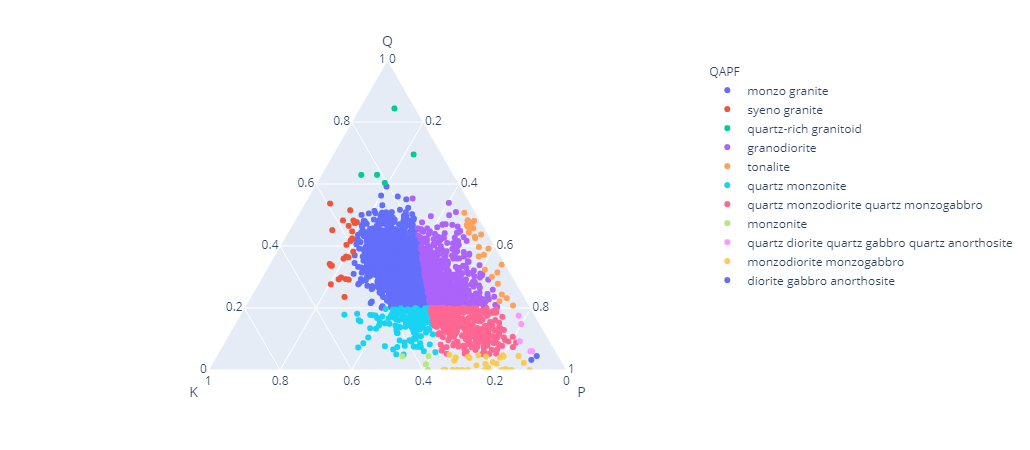

In [13]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final1, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/1_normalized_QAPF.pdf")
fig.show()

In [15]:
df_final1.to_excel("../_CIPW/CIPW/1_normalized.xlsx", index=True)

-------

# CIPWFULL nonprior-normalized data

## Convert to CIPWFULL format

**remark**
changing the normalization factor in the convert_to_CIWFULL_format

## Extract results from CIPWFULL results file

## QAPF classification

------

# CIPWFULL non_normalized data

## Convert to CIPWFULL format

In [16]:
original_nonnormalized = pd.read_excel("../_CLEANED/Vistelius_data_cleaned.xlsx", index_col=0)
# Only iterested in sample number and oxides
nonnormalized = original_nonnormalized[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']]
nonnormalized = preproc.replace_nan(nonnormalized, "0.01")
nonnormalized

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO    CaO  Na2O   K2O  P2O5
1     80.80  0.04  10.16  0.61  1.72  0.01   0.4   0.55  2.00  3.59  0.01
2     80.00   0.1  10.10  0.17  0.56  0.02   0.4   0.35  2.30  5.10  0.05
3     79.92  0.05   9.89  0.16  1.73  0.02  0.12   0.14  0.75  6.15  0.01
4     79.65  0.04   9.64  1.15  0.75   0.1  0.45   0.67  3.71  4.25  0.01
5     79.18  0.08  10.24  0.64  2.60  0.04  0.05   1.25  1.52  3.08  0.01
...     ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   ...
4655  51.09  0.39  19.44  4.09  4.97  0.22  3.79   8.02  4.12  2.01  0.59
4656  50.90     1  17.76  2.61  8.99   0.1  5.07   8.46  2.66  1.64  0.26
4657  50.40  1.15  18.03  4.21  5.22  0.16  5.84   8.45  2.68  2.24  0.47
4658  50.34  1.13  22.01  2.28  4.18   0.1  2.73   9.41  4.06  1.09  0.46
4659  50.19   0.8  19.45  5.33  4.10  0.01  4.94  11.33  2.84  0.75  0.01

[4659 rows x 11 columns]

In [17]:
nonnormalized.head()

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO   CaO  Na2O   K2O  P2O5
1  80.80  0.04  10.16  0.61  1.72  0.01   0.4  0.55  2.00  3.59  0.01
2  80.00   0.1  10.10  0.17  0.56  0.02   0.4  0.35  2.30  5.10  0.05
3  79.92  0.05   9.89  0.16  1.73  0.02  0.12  0.14  0.75  6.15  0.01
4  79.65  0.04   9.64  1.15  0.75   0.1  0.45  0.67  3.71  4.25  0.01
5  79.18  0.08  10.24  0.64  2.60  0.04  0.05  1.25  1.52  3.08  0.01

In [18]:
cipw.convert_to_CIPWFULL_format(nonnormalized, "../_CIPW/CIPW/2_nonnormalized.txt", dataset_name="Vistelius (1995)")

## Extract results from CIPWFULL results file

In [19]:
df_final3 = cipw.extract_CIPW_results("../_CIPW/CIPW/2_nonnormalized_results_excel.txt")

In [20]:
df_final3

Q          P          K
 SAMPLE                                   
 1         52.491692  18.739218  22.059887
 2         45.549942  19.897171  31.109591
 3         50.202160   6.657726  36.658440
 4         41.581013  24.626029  26.409909
 5         53.917336  18.353488  18.843166
...              ...        ...        ...
 4655       0.000000  61.730340  13.620341
 4656       0.184801  53.056850  10.816301
 4657       0.491476  52.092567  14.370241
 4658       0.000000  71.246699   8.158558
 4659       2.249557  60.935395   5.633326

[4659 rows x 3 columns]

## QAPF classification

In [21]:
df_final3["QAPF"] = qapf.check_QAPF_region(df_final3)

In [22]:
df_final3["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'monzonite',
       'quartz diorite\nquartz gabbro\nquartz anorthosite',
       'monzodiorite monzogabbro', 'diorite gabbro anorthosite'],
      dtype=object)

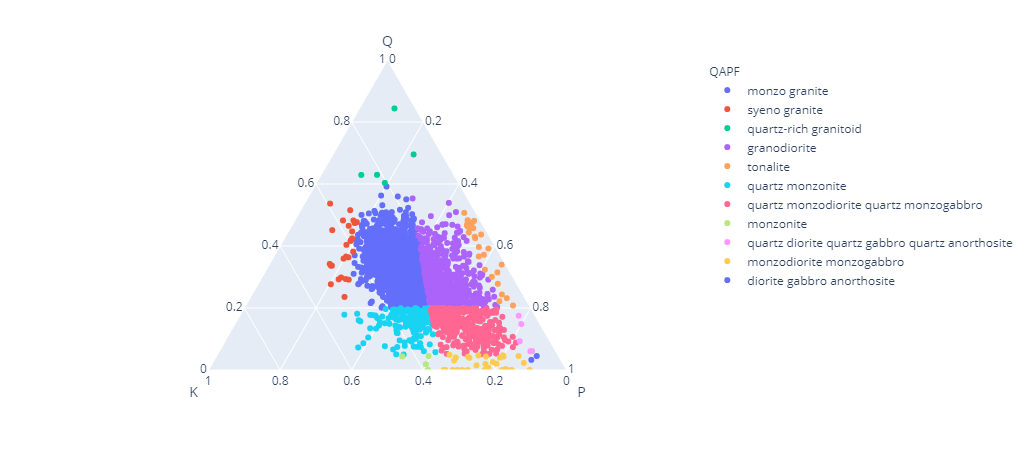

In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final3, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/2_nonormalized_QAPF.pdf")
fig.show()

In [24]:
df_final3.to_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index=True)

-----

# Check alkalinity

**Remark**
wanted to check if both calculations delivered the same results--> there are some differences

In [74]:
check_alkalinity1 = pd.read_excel("../_CIPW/CIPW/1_normalized_all_results.xlsx", index=1, usecols=[20])
check_alkalinity2 = pd.read_excel("../_CIPW/CIPW/2_nonnormalized_all_results.xlsx", index=1, usecols=[20])

In [76]:
check_alkalinity2

ALKALINITY
0     PERALUMINOUS
1     PERALUMINOUS
2     PERALUMINOUS
3     PERALKALINE 
4     PERALUMINOUS
...            ...
4655  METALUMINOUS
4656  METALUMINOUS
4657  METALUMINOUS
4658  METALUMINOUS
4659    ALKALINITY

[4660 rows x 1 columns]

In [77]:
check_alkalinity1.iloc[:, 0].value_counts().to_excel("../_CIPW/CIPW/1_ASI_counts_normalized.xlsx")
check_alkalinity2.iloc[:, 0].value_counts().to_excel("../_CIPW/CIPW/2_ASI_counts_nonnormalized.xlsx")

**remark**
almost the same, nonnormalized = one peraluminous sample more

-----

# creating data to plot QAPF in Qgis

In [25]:
QAPF_plot = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF = pd.read_excel("../_CIPW/CIPW/1_normalized.xlsx", index_col=0)
#QAPF_plot_nonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#QAPF_nonorm = pd.read_excel("../_CIPW/non_normalized_QAPF.xlsx", index_col=0)
QAPF_plot_totnonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF_totnonorm = pd.read_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index_col=0)

In [26]:
QAPF_totnonorm

Q          P          K                        QAPF
 SAMPLE                                                             
1        52.491692  18.739218  22.059887               monzo granite
2        45.549942  19.897171  31.109591               monzo granite
3        50.202160   6.657726  36.658440               syeno granite
4        41.581013  24.626029  26.409909               monzo granite
5        53.917336  18.353488  18.843166               monzo granite
...            ...        ...        ...                         ...
4655      0.000000  61.730340  13.620341    monzodiorite monzogabbro
4656      0.184801  53.056850  10.816301    monzodiorite monzogabbro
4657      0.491476  52.092567  14.370241    monzodiorite monzogabbro
4658      0.000000  71.246699   8.158558    monzodiorite monzogabbro
4659      2.249557  60.935395   5.633326  diorite gabbro anorthosite

[4659 rows x 4 columns]

In [27]:
QAPF_plot.insert(2, "QAPF", QAPF['QAPF']) 
#QAPF_plot_nonorm.insert(2, "QAPF", QAPF_nonorm['QAPF']) 
QAPF_plot_totnonorm.insert(2, "QAPF", QAPF_totnonorm['QAPF']) 

In [28]:
QAPF_plot_totnonorm

Latitude     Longitude                        QAPF
1     44°31'30.0"  138°37'30.0"               monzo granite
2     54°12'10.0"   119°24'0.0"               monzo granite
3      62°36'0.0"   155°36'0.0"               syeno granite
4      61°35'0.0"    146°2'0.0"               monzo granite
5      68°55'0.0"   164°24'0.0"               monzo granite
...           ...           ...                         ...
4655   66°42'0.0"   164°23'0.0"    monzodiorite monzogabbro
4656  46°56'30.0"    137°5'3.0"    monzodiorite monzogabbro
4657   58°12'0.0"   138°12'0.0"    monzodiorite monzogabbro
4658   60°51'0.0"   147°31'0.0"    monzodiorite monzogabbro
4659   66°19'0.0"   165°30'0.0"  diorite gabbro anorthosite

[4659 rows x 3 columns]

In [29]:
QAPF_plot.to_excel("../_CIPW/CIPW/1_normalized_QAPF_plot.xlsx", index=True)
#QAPF_plot_nonorm.to_excel("../_CIPW/QAPF_plot_non_normalized.xlsx", index=True)
QAPF_plot_totnonorm.to_excel("../_CIPW/CIPW/2_nonnormalized_QAPF_plot.xlsx", index=True)

In [30]:
QAPF_plot.iloc[:, 2].value_counts().to_excel("../_CIPW/CIPW/1_normalized_QAPF_count.xlsx")
#QAPF_plot_nonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/QAPF_count_non_normalized.xlsx")
QAPF_plot_totnonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/CIPW/2_nonnormalized_QAPF_count.xlsx")

**remark**
Classificaton is entirely the same --> also no differences can be seen on the ternairy diagrams, points don't even move a little bit

------

# checking QAPF with classification in Vistelius

**remark**
checked if there are a lot of differences and remarkable features between the two datasets. there are some differences, but that's logical i think, but in general it looked ok.  


In [31]:
Vist_check = pd.read_excel("../_Results/text_temp_cleaned_handmatig_finalversion.xlsx", index_col=0, usecols=[0, 8])
QAPF1 = pd.read_excel("../_CIPW/CIPW/1_normalized.xlsx", index_col=0)
QAPF2 = pd.read_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index_col=0)
QAPF3 = pd.read_excel("../_CIPW/QAPF.xlsx", index_col=0)

In [32]:
QAPF1

Q          P          K                        QAPF
 SAMPLE                                                             
1        52.549507  18.759860  22.084160               monzo granite
2        45.940433  20.067755  31.376282               monzo granite
3        50.739986   6.729074  37.051196               syeno granite
4        41.407116  24.523047  26.299426               monzo granite
5        54.633030  18.597145  19.093267               monzo granite
...            ...        ...        ...                         ...
4655      0.000000  62.524385  13.795574    monzodiorite monzogabbro
4656      0.185825  53.350269  10.876120    monzodiorite monzogabbro
4657      0.497182  52.698612  14.537424    monzodiorite monzogabbro
4658      0.000000  72.856814   8.342915    monzodiorite monzogabbro
4659      2.255181  61.088129   5.647447  diorite gabbro anorthosite

[4659 rows x 4 columns]

In [33]:
Vist_check.insert(1, "QAPF_normalized", QAPF1['QAPF']) 
Vist_check.insert(1, "QAPF_nonnormalized", QAPF2['QAPF'])
Vist_check.insert(1, "QAPF_albite_wrong", QAPF3['QAPF']) 

In [34]:
Vist_check

type_granite           QAPF_albite_wrong  \
1                  Granite leucogranitic               monzo granite   
2                    Granite leucocratic               monzo granite   
3     Granite leucocratic coarse-grained               syeno granite   
4                    Granite leucocratic               monzo granite   
5       Granite-porphyry micropegmatitic               monzo granite   
...                                  ...                         ...   
4655                             Diorite    monzodiorite monzogabbro   
4656                      Quartz diorite    monzodiorite monzogabbro   
4657                             Diorite    monzodiorite monzogabbro   
4658                             Diorite  diorite gabbro anorthosite   
4659                             Diorite  diorite gabbro anorthosite   

              QAPF_nonnormalized             QAPF_normalized  
1                  monzo granite               monzo granite  
2                  monzo granite               monzo granite  
3                  syeno granite               syeno granite  
4                  monzo granite               monzo granite  
5                  monzo granite               monzo granite  
...                          ...                         ...  
4655    monzodiorite monzogabbro    monzodiorite monzogabbro  
4656    monzodiorite monzogabbro    monzodiorite monzogabbro  
4657    monzodiorite monzogabbro    monzodiorite monzogabbro  
4658    monzodiorite monzogabbro    monzodiorite monzogabbro  
4659  diorite gabbro anorthosite  diorite gabbro anorthosite  

[4659 rows x 4 columns]

In [35]:
Vist_check.to_excel("../_CIPW/CIPW/QAPF_Check.xlsx", index=True)

-----